In [1]:
#implementing forecasting for airlines data

In [2]:
#import data as well as libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [56]:
df = pd.read_excel("C:\\Users\\prakruthi\\Desktop\\datascience assignments\\forecasting\\Airlines+Data.xlsx")

In [57]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [61]:
df.rename(columns={"Passengers ('000)":"Passengers"},inplace=True)

In [62]:
# Converting the normal index of Amtrak to time stamp 
df.index = pd.to_datetime(df.Month,format="%b-%y")


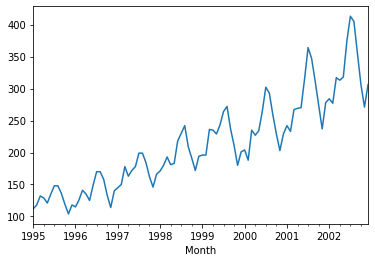

In [63]:
df.Passengers.plot() # time series plot

In [64]:
# Creating a Date column to store the actual Date format for the given Month column
df["Date"] = pd.to_datetime(df.Month,format="%b-%y")

In [65]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 


In [66]:
df["month"] = df.Date.dt.strftime("%b") # month extraction

In [67]:
df["year"] = df.Date.dt.strftime("%Y") # year extraction


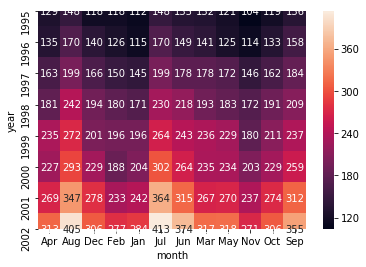

In [68]:

# Some EDA on Time series data 
# Heat map visualization 
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")


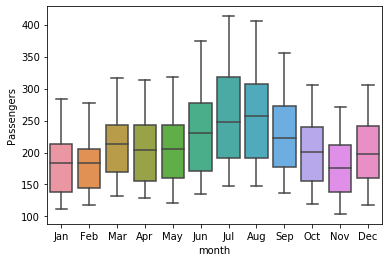

In [69]:
sns.boxplot(x="month",y="Passengers",data=df)


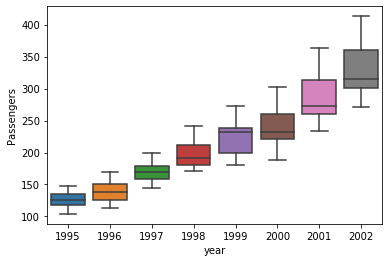

In [70]:
sns.boxplot(x="year",y="Passengers",data=df)

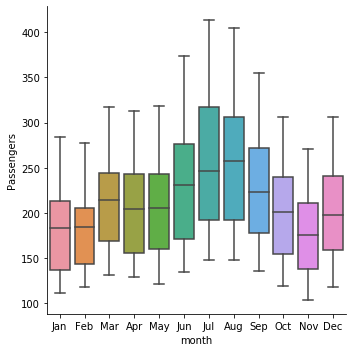

In [71]:
sns.catplot("month","Passengers",data=df,kind="box")

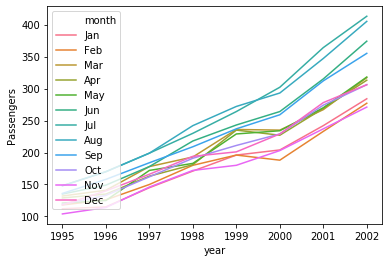

In [72]:
# Line plot for Sales based on year  and for each month
sns.lineplot(x="year",y="Passengers",hue="month",data=df)

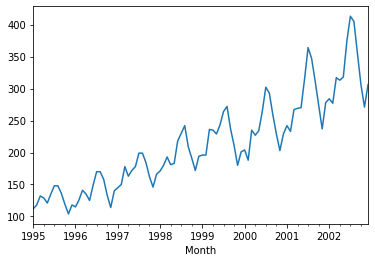

In [73]:
# moving average for the time series to understand better about the trend character in df
df.Passengers.plot(label="org")

In [74]:
df.shape

(96, 5)

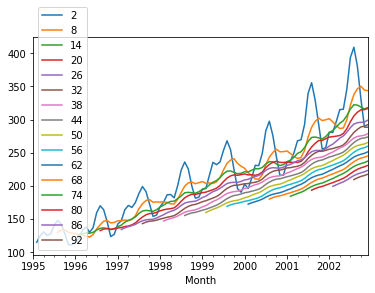

In [75]:
for i in range(2,96,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

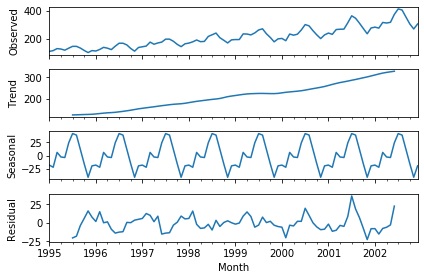

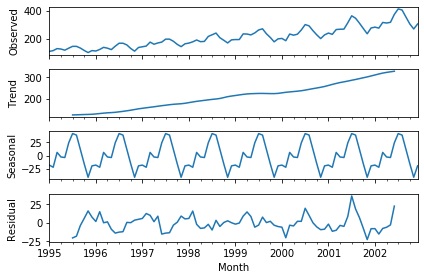

In [79]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(df.Passengers,model="additive")
decompose_ts_add.plot()



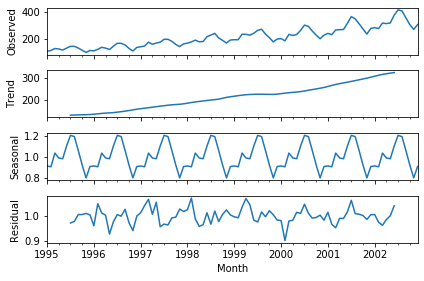

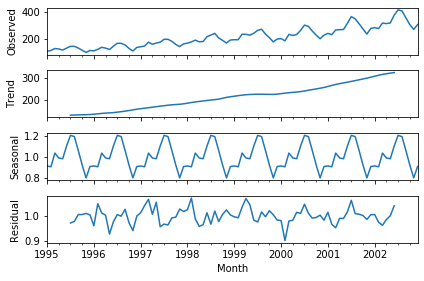

In [78]:
decompose_ts_mul = seasonal_decompose(df.Passengers,model="multiplicative")
decompose_ts_mul.plot()

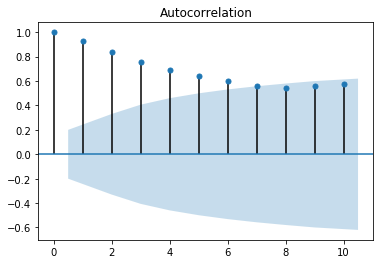

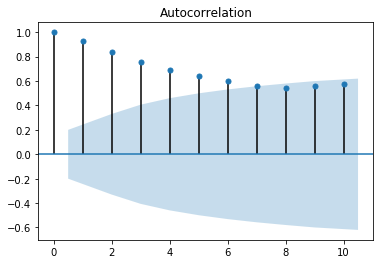

In [80]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(df.Passengers,lags=10)


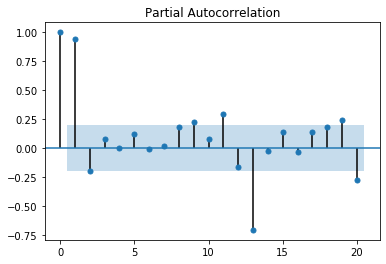

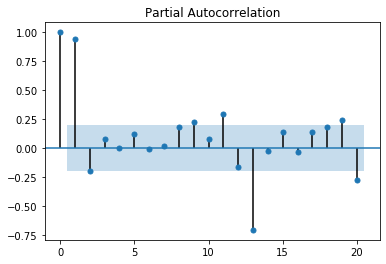

In [81]:
tsa_plots.plot_pacf(df.Passengers)

In [85]:
# splitting the data into Train and Test data and considering the last 12 months data as 
# Test data and left over data as train data 
Train = df.head(80)
Test = df.tail(16) 

In [86]:

# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [87]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

C:\Users\prakruthi\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


17.538105123502607

In [88]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

C:\Users\prakruthi\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


22.17777712389595

In [89]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

C:\Users\prakruthi\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\prakruthi\Anaconda4\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


9.050205160230682

In [90]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

C:\Users\prakruthi\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


3.2319373594551237

In [91]:
df

,Month,Passengers,Date,month,year
Month,,,,,
1995-01-01,1995-01-01,112,1995-01-01,Jan,1995
1995-02-01,1995-02-01,118,1995-02-01,Feb,1995
1995-03-01,1995-03-01,132,1995-03-01,Mar,1995
1995-04-01,1995-04-01,129,1995-04-01,Apr,1995
1995-05-01,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
2002-08-01,2002-08-01,405,2002-08-01,Aug,2002
2002-09-01,2002-09-01,355,2002-09-01,Sep,2002
2002-10-01,2002-10-01,306,2002-10-01,Oct,2002
